In [13]:
import dkist
import astropy
import numpy as np
import matplotlib.pyplot as plt
import sunpy
import sunpy.map
from ndcube import NDCube

In [4]:
vbi_gband_dir = '../../src/DKIST/vbi_1024/AEZDV/'
vbi_gband_dataset = dkist.load_dataset(vbi_gband_dir)

In [10]:
vbi_gband_dataset.meta['headers'][137]['DATE-AVG']

'2022-10-24T19:20:02.820349'

<WCSAxes: >

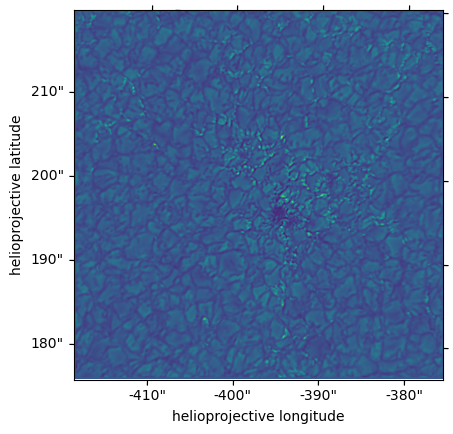

In [28]:
vbi_gband_dataset[137].plot()

In [23]:
vbi_gband_map = sunpy.map.Map('../../src/DKIST/vbi_1024/AEZDV/VBI_2022_10_24T19_20_02_820_00430500_I_AEZDV_L1.fits')

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,hglt_obs,dsun_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs
 [sunpy.map.mapbase]


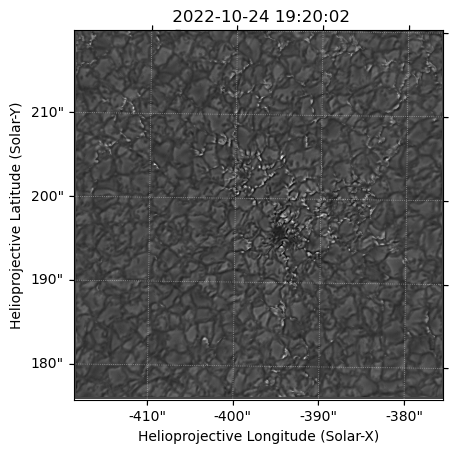

In [24]:
vbi_gband_map.plot()

In [29]:
hmi_ic_map = sunpy.map.Map('../../src/HMI/20221024/lvl15/hmi.Ic_45s.20221024_192100_TAI.2.continuum.fits')

In [31]:
hmi_ic_map_repro = hmi_ic_map.reproject_to(vbi_gband_map.wcs)

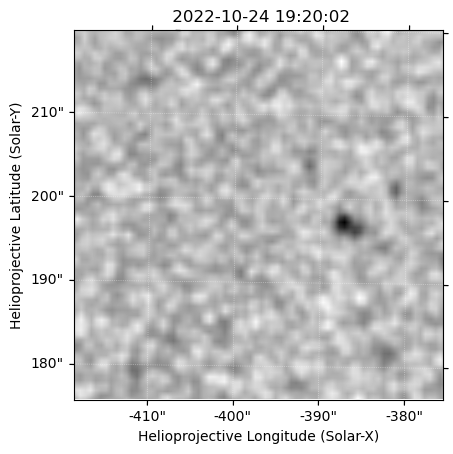

In [32]:
hmi_ic_map_repro.plot()

In [35]:
hmi_ic_cube = NDCube(hmi_ic_map.data, wcs=hmi_ic_map.wcs)
hmi_ic_cube_repro = hmi_ic_cube.reproject_to(vbi_gband_dataset[137].wcs)

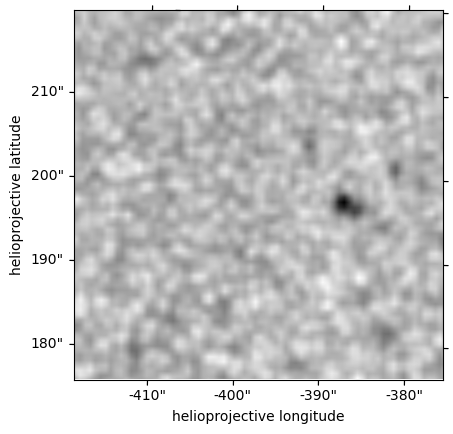

In [42]:
hmi_ic_cube_repro.plot(cmap='gray')
plt.grid('on',alpha=0.8)

In [ ]:
vbi_gband_map_crop = vbi_gband_map.submap([0, 0], [1024, 1024])